In [1]:
# plot limits digitized from paper 1607.01009
import ROOT as rt
import csv
import re
import sys
import collections
import os
from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/login-1/christiw/DM/SNSPD_GaAs_limit/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph


Welcome to JupyROOT 6.18/02


In [2]:
path = '/storage/af/user/christiw/login-1/christiw/DM/SNSPD_GaAs_limit/data/'

ele_recoil = {}
limits = {}

ele_recoil['Fdmq-2_0p01GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdmq-2_GaAs_0p01GeV.csv', delimiter = ',')
ele_recoil['Fdmq-2_1GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdmq-2_GaAs_1GeV.csv', delimiter = ',')
ele_recoil['Fdm1_0p01GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdm1_GaAs_0p01GeV.csv', delimiter = ',')
ele_recoil['Fdm1_1GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdm1_GaAs_1GeV.csv', delimiter = ',')


limits['Fdmq-2_1ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdmq-2_GaAs_1ph.csv', delimiter = ',')
limits['Fdm1_1ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdm1_GaAs_1ph.csv', delimiter = ',')
limits['Fdmq-2_2ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdmq-2_GaAs_2ph.csv', delimiter = ',')
limits['Fdm1_2ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdm1_GaAs_2ph.csv', delimiter = ',')

limits['Fdmq-2_XENON'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdmq-2_XENON10_1kg-year.csv', delimiter = ',')
limits['Fdm1_XENON'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdm1_XENON10_1kg-year.csv', delimiter = ',')


# limits

Fdmq-2_1ph 10 MeV 	 9.55439609244055e-41
Fdmq-2_1ph 1 GeV 	 5.433977603785252e-39
Fdm1_1ph 10 MeV 	 1.5623794246649633e-41
Fdm1_1ph 1 GeV 	 3.995835525531366e-40
Fdmq-2_2ph 10 MeV 	 1.0978437670592664e-40
Fdmq-2_2ph 1 GeV 	 5.4691603502381925e-39
Fdm1_2ph 10 MeV 	 1.6168144448012485e-41
Fdm1_2ph 1 GeV 	 3.995835525531366e-40
Fdmq-2_XENON 10 MeV 	 5.1019716831466e-35
Fdmq-2_XENON 1 GeV 	 3.6267967133454243e-34
Fdm1_XENON 10 MeV 	 8.444630163214017e-37
Fdm1_XENON 1 GeV 	 1.6430698465128132e-37


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


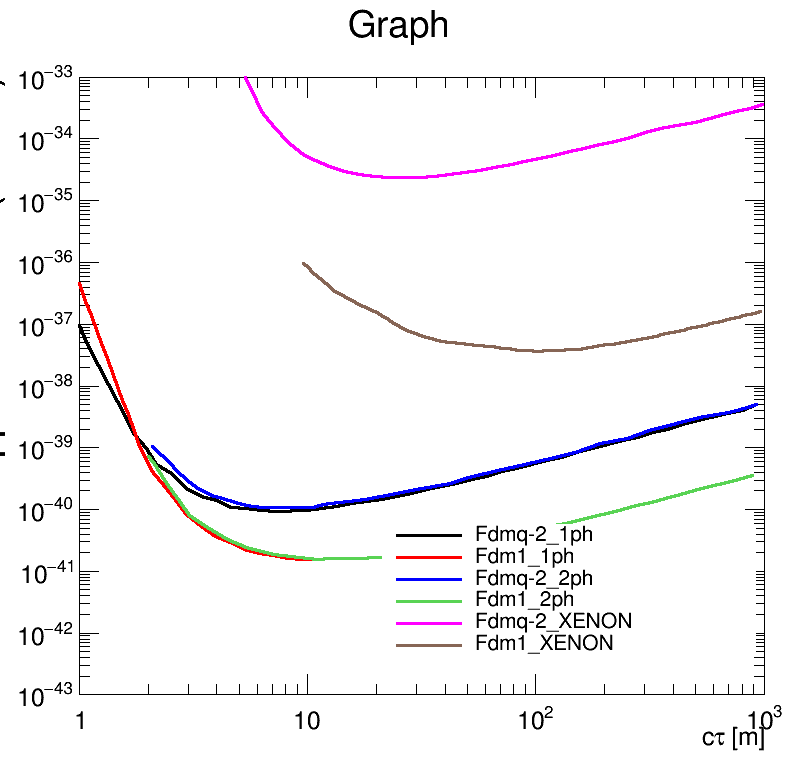

In [4]:

leg = rt.TLegend(0.48,0.15,0.95,0.32)
leg2 = rt.TLegend(0.18,0.17,0.40,0.30)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
leg2.SetTextSize(0.032)
leg2.SetBorderSize(0)
leg2.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
c.SetRightMargin(0.04)

rt.gStyle.SetOptFit(1011)
h = {}
h_exp1sig = {}
h_exp2sig = {}
h_obs = {}
h_others = {}
sample_temp = []

for i, m in enumerate(limits.keys()):


    h[m] = create_TGraph(limits[m][:,0], limits[m][:,1],  axis_title=['c#tau [m]', '95% CL upper limit on BR(h#rightarrow SS)'])
    leg.AddEntry(h[m],m, "L")

    h[m].SetLineColor(std_color_list[i])
    h[m].SetMarkerColor(std_color_list[i])

    h[m].SetLineWidth(3)

    h[m].SetLineStyle(1)
    h[m].SetLineWidth(3)
    h[m].GetXaxis().SetLimits(1,1000.0)
    h[m].GetYaxis().SetRangeUser(1e-43,1e-33)

    h[m].GetXaxis().SetTitleOffset(1)
    h[m].GetYaxis().SetTitleSize(0.05)
    h[m].GetYaxis().SetTitleOffset(1.5)
    print(m, '10 MeV \t', h[m].Eval(10))
    print(m, '1 GeV \t',h[m].Eval(1000))



for i,m in enumerate(h.keys()):
    h[m].Draw('LA' if i == 0 else 'Lsame')





leg.Draw()
c.SetLogy()
c.SetLogx()
c.SetTicky(1)
c.SetTickx(1)

c.Draw()
